## Study SIR model and solvers for differential equations systems (ODE etc)

Define and solve the SIR model by using ode solver from availables libraries (if too slow then use Julia)

In [1]:
import pandas as pd
import numpy as np
import math

from scipy.integrate import odeint
import plotly

# Ode solvers and stuffs

# import local functions
import covid19_analysis.dataFun as df
import covid19_analysis.dataPlot as dplot

In [40]:
%load_ext autoreload
%autoreload 2

Define basic variables, initial simulation taken from https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

In [70]:
# Total population, N.
N = 100000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact or transmission rate
beta = .5
# recovery rate in 1/days
gamma = .16
#
print('Basic reproductive number: R_0 = %.2f' %(beta/gamma))
# A grid of time points (in days)
t = np.linspace(0, 80, 81)

Basic reproductive number: R_0 = 3.12


Define the equation system for SIR model

In [71]:
t

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80.])

In [72]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

Define initial conditions and run the solver

In [73]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

Plot results and test extra analysis

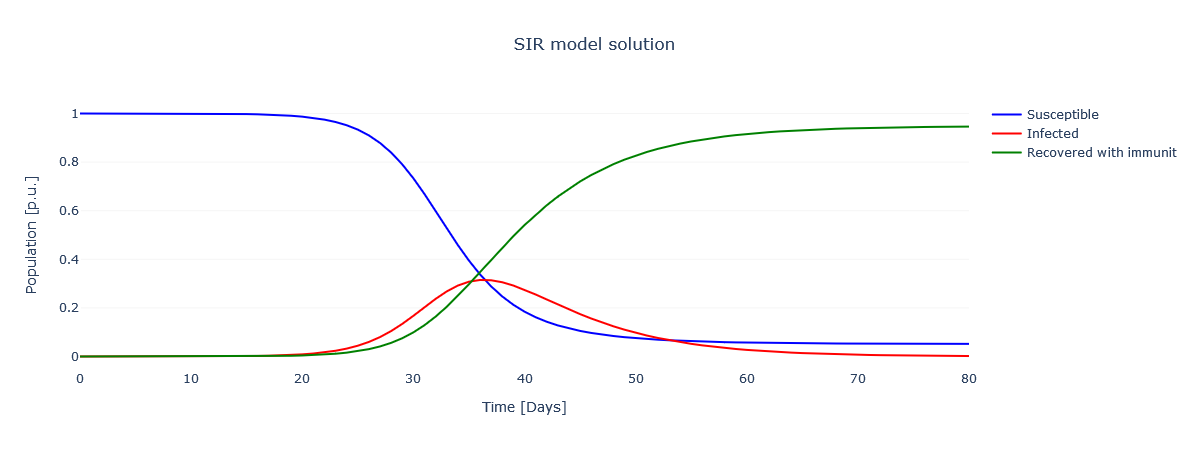

In [74]:
fig = plotly.graph_objs.Figure()

#% add susceptibles
fig.add_trace(
    plotly.graph_objs.Scatter(
        mode = 'lines',
        x = t,
        y = S/N,
        marker = dict(color = 'Blue', line = dict(color = 'DarkBlue', width=1.5)),
        name = 'Susceptible'
    ))

# add infected
fig.add_trace(
    plotly.graph_objs.Scatter(
        mode = 'lines',
        x = t,
        y = I/N,
        marker = dict(color = 'Red', line = dict(color = 'DarkRed', width=1.5)),
        name = 'Infected'
    ))

# add recovered with immunity
fig.add_trace(
    plotly.graph_objs.Scatter(
        mode = 'lines',
        x = t,
        y = R/N,
        marker = dict(color = 'Green', line = dict(color = 'DarkGreen', width=1.5)),
        name = 'Recovered with immunity'
    ))

fig.update_layout(
    plot_bgcolor='white', 
    xaxis_title = 'Time [Days]',
    yaxis_title = 'Population [p.u.]',
    title = 'SIR model solution',
    title_x = .5
    )
fig.update_yaxes(showgrid=True, gridwidth=.3, gridcolor='gainsboro')

fig.show()

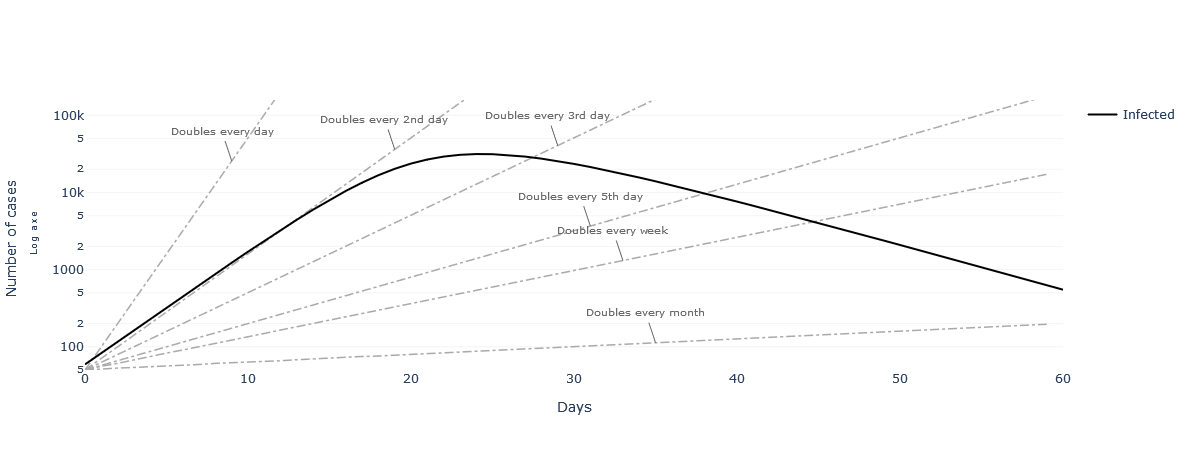

In [90]:
# Check the gowth ratio over time
I_cum = np.cumsum(I)
dplot.growing_ratio_countries(I,'Infected', pop_th=50,num_days=60, df_source='raw_data')

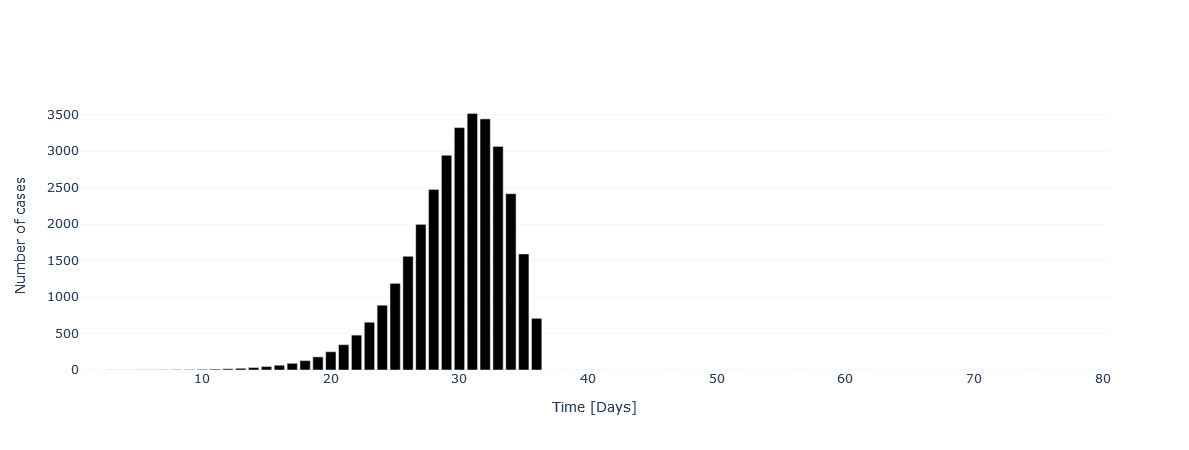

In [91]:
# check daily cases
fig = plotly.graph_objs.Figure()

# calculate daily infected
I_day = I[1:] - I[:-1]

fig.add_trace(
    plotly.graph_objs.Bar(
        x = t[1:],
        y = I_day.clip(min=0),
        marker = dict(color = 'Black')
    ))

fig.update_layout(
    plot_bgcolor='white', 
    xaxis_title = 'Time [Days]',
    yaxis_title = 'Number of cases',
    )
fig.update_yaxes(showgrid=True, gridwidth=.3, gridcolor='gainsboro')


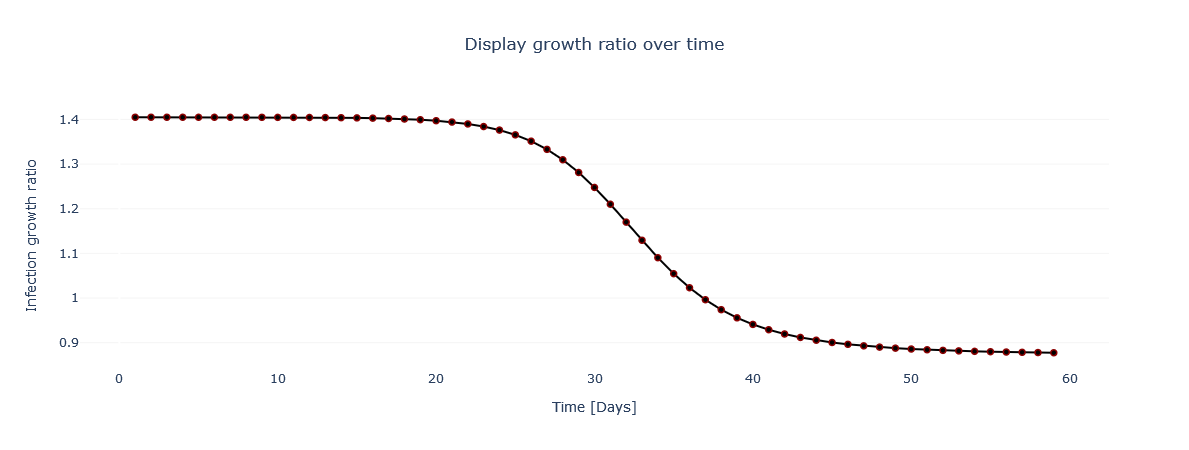

In [92]:
# display infection growth ratio over time
I_gr = df.safe_div(I[1:], I[:-1])

fig = plotly.graph_objs.Figure()
fig.add_trace(
    plotly.graph_objs.Scatter(
        mode = 'lines+markers',
        x = t[1:60],
        y = I_gr,
        marker = dict(color = 'Black', line = dict(color = 'DarkRed', width=1.5)),
    ))

fig.update_layout(
    plot_bgcolor='white', 
    xaxis_title = 'Time [Days]',
    yaxis_title = 'Infection growth ratio',
    title = 'Display growth ratio over time',
    title_x = .5
    )
fig.update_yaxes(showgrid=True, gridwidth=.3, gridcolor='gainsboro')

fig.show()